In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [44]:
mobike=pd.read_csv('mobike.csv')

# Data Cleaning & Preprocessing

In [45]:
mobike.info()
#Unamed:0&start/end_time&station_name are all useless, need to drop; 
#tripduration&age should be int or float; 
#gender&birthyear got Null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6427 entries, 0 to 6426
Data columns (total 15 columns):
Unnamed: 0           6427 non-null int64
user_id              6427 non-null int64
start_time           6427 non-null object
end_time             6427 non-null object
timeduration         6427 non-null int64
bikeid               6427 non-null int64
tripduration         6427 non-null object
from_station_id      6427 non-null int64
from_station_name    6427 non-null object
to_station_id        6427 non-null int64
to_station_name      6427 non-null object
usertype             6427 non-null object
gender               5938 non-null object
birthyear            5956 non-null float64
age                  6427 non-null object
dtypes: float64(1), int64(6), object(8)
memory usage: 753.2+ KB


In [46]:
mobike.drop(['Unnamed: 0','start_time','end_time','from_station_name','to_station_name'],axis=1,inplace=True)

In [47]:
mobike['age']=mobike['age'].str.replace(' ','0').astype(int)
#after investigation found that the reason why age got no null value and type is object 
# is because there's spacing in excel, so need to replace spacing with 0 then convert to int type

In [48]:
mobike['tripduration'] = mobike['tripduration'].str.replace(',','').astype(int)
#after investigation found that there's ',' in excel, need to remove

In [49]:
mobike['gender']=pd.DataFrame(mobike.gender.replace(to_replace=np.nan,value='Unknown'))
#change the Null value in gender with Unknown, birthyear is useless in future analysis

In [50]:
mobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6427 entries, 0 to 6426
Data columns (total 10 columns):
user_id            6427 non-null int64
timeduration       6427 non-null int64
bikeid             6427 non-null int64
tripduration       6427 non-null int32
from_station_id    6427 non-null int64
to_station_id      6427 non-null int64
usertype           6427 non-null object
gender             6427 non-null object
birthyear          5956 non-null float64
age                6427 non-null int32
dtypes: float64(1), int32(2), int64(5), object(2)
memory usage: 452.0+ KB


In [51]:
mobike.describe()
#found that tripduration and age got something abnormal, need to dispose accordingly

,user_id,timeduration,bikeid,tripduration,from_station_id,to_station_id,birthyear,age
count,6.427000e+03,6427.000000,6427.000000,6.427000e+03,6427.000000,6427.000000,5956.000000,6427.000000
mean,2.135519e+07,11.778902,3491.637934,1.060471e+03,195.038432,198.502567,1982.488583,33.835693
std,2.181294e+05,9.692236,1912.171846,1.456811e+04,148.170025,148.939873,11.147859,14.342768
min,2.098358e+07,0.000000,2.000000,6.100000e+01,2.000000,2.000000,1906.000000,0.000000
25%,2.116805e+07,5.000000,1852.000000,3.490000e+02,77.000000,80.000000,1977.000000,27.000000
50%,2.135114e+07,9.000000,3618.000000,5.590000e+02,168.000000,172.000000,1986.000000,32.000000
75%,2.154376e+07,15.000000,5179.500000,9.320000e+02,287.000000,287.000000,1991.000000,41.000000
max,2.174223e+07,59.000000,6470.000000,1.139070e+06,662.000000,661.000000,2002.000000,113.000000


In [52]:
mobike=mobike[mobike['age']<80]
mobike=mobike[mobike['tripduration']<100000]

In [53]:
mobike.describe()

,user_id,timeduration,bikeid,tripduration,from_station_id,to_station_id,birthyear,age
count,6.422000e+03,6422.000000,6422.000000,6422.000000,6422.000000,6422.000000,5952.000000,6422.000000
mean,2.135515e+07,11.769698,3491.498599,847.153379,195.020399,198.500156,1982.520329,33.809872
std,2.181462e+05,9.675359,1912.438364,1491.947550,148.202140,148.897299,11.042223,14.257815
min,2.098358e+07,0.000000,2.000000,61.000000,2.000000,2.000000,1940.000000,0.000000
25%,2.116804e+07,5.000000,1851.500000,349.000000,77.000000,80.000000,1977.000000,27.000000
50%,2.135113e+07,9.000000,3618.000000,558.500000,168.000000,172.000000,1986.000000,32.000000
75%,2.154380e+07,15.000000,5179.750000,930.750000,287.000000,287.000000,1991.000000,41.000000
max,2.174223e+07,59.000000,6470.000000,57368.000000,662.000000,661.000000,2002.000000,79.000000


In [54]:
mobike=pd.get_dummies(mobike)#type conversion

In [55]:
mobike.head()

,user_id,timeduration,bikeid,tripduration,from_station_id,to_station_id,birthyear,age,usertype_Customer,usertype_Subscriber,gender_Female,gender_Male,gender_Unknown
0,21499218,7,2631,436,319,67,1982.0,37,0,1,0,1,0
1,21694389,7,1565,445,164,195,1988.0,31,0,1,0,1,0
2,21110722,18,2231,1090,163,69,1989.0,30,1,0,0,1,0
3,21485409,9,4226,581,226,308,1989.0,30,0,1,1,0,0
4,21445994,6,3475,390,77,621,1979.0,40,0,1,0,1,0


In [56]:
mobike.drop(['usertype_Subscriber','gender_Unknown'],axis=1,inplace=True)

In [71]:
mobike.head()

,user_id,timeduration,bikeid,tripduration,from_station_id,to_station_id,birthyear,age,usertype_Customer,gender_Female,gender_Male
0,21499218,7,2631,436,319,67,1982.0,37,0,0,1
1,21694389,7,1565,445,164,195,1988.0,31,0,0,1
2,21110722,18,2231,1090,163,69,1989.0,30,1,0,1
3,21485409,9,4226,581,226,308,1989.0,30,0,1,0
4,21445994,6,3475,390,77,621,1979.0,40,0,0,1


# Data Modeling

In [58]:
#1
mobike_=mobike[['timeduration','tripduration','age','usertype_Customer','gender_Female','gender_Male']]
# Select proper features

In [59]:
from sklearn.preprocessing import scale
from sklearn import cluster
x=pd.DataFrame(scale(mobike_))#data standardization

In [60]:
model=cluster.KMeans(n_clusters=3,random_state=30)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=30, tol=0.0001, verbose=0)

In [61]:
mobike_['cluster']=model.labels_

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
mobike_.head()

,timeduration,tripduration,age,usertype_Customer,gender_Female,gender_Male,cluster
0,7,436,37,0,0,1,1
1,7,445,31,0,0,1,1
2,18,1090,30,1,0,1,2
3,9,581,30,0,1,0,0
4,6,390,40,0,0,1,1


In [63]:
mobike_.groupby(['cluster'])['timeduration'].describe()
# for cluster 0 and 1, the average of timeduration is similar, cluster 2 differs more with these two

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1257.0,11.145585,8.167843,1.0,6.0,9.0,14.0,58.0
1,4516.0,10.152126,7.587430,0.0,5.0,8.0,13.0,59.0
2,649.0,24.234206,14.919144,0.0,12.0,21.0,34.0,59.0


In [64]:
mobike_.groupby(['cluster'])['tripduration'].describe()
#similar as timeduration

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1257.0,711.914081,559.028177,61.0,367.0,556.0,875.0,7487.0
1,4516.0,650.676705,554.819359,74.0,325.0,504.5,812.0,14657.0
2,649.0,2476.251156,4042.686431,231.0,902.0,1491.0,2688.0,57368.0


In [65]:
mobike_.groupby(['cluster'])['age'].describe()
#cluster 2 group with a large number of null age

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1257.0,35.007955,10.377889,18.0,28.0,31.0,39.0,72.0
1,4516.0,37.033437,11.233729,0.0,29.0,34.0,43.0,79.0
2,649.0,9.058552,15.411925,0.0,0.0,0.0,23.0,63.0


In [66]:
mobike_.groupby(['cluster'])['usertype_Customer'].describe()
#more Customer inside the cluster 2,more Subscriber in 0 and 1

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1257.0,0.011933,0.108629,0.0,0.0,0.0,0.0,1.0
1,4516.0,0.005979,0.077099,0.0,0.0,0.0,0.0,1.0
2,649.0,0.972265,0.164339,0.0,1.0,1.0,1.0,1.0


In [67]:
mobike_.groupby(['cluster'])['gender_Female'].describe()
#cluster 0 is totally Female customer

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1257.0,1.000000,0.00000,1.0,1.0,1.0,1.0,1.0
1,4516.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
2,649.0,0.067797,0.25159,0.0,0.0,0.0,0.0,1.0


In [68]:
mobike_.groupby(['cluster'])['gender_Male'].describe()
#cluster 1 got most Male customer

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1257.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,4516.0,0.996014,0.063014,0.0,1.0,1.0,1.0,1.0
2,649.0,0.209553,0.407304,0.0,0.0,0.0,0.0,1.0


# Model Assessment

In [69]:
from sklearn import metrics
x_cluster=model.fit_predict(x)
score=metrics.silhouette_score(x,x_cluster)

In [72]:
print(score)

0.5935125254648099


In [73]:
centers=pd.DataFrame(model.cluster_centers_)

In [74]:
centers.to_csv('center_.csv')

# Model Optimization

In [77]:
from sklearn.cluster import KMeans

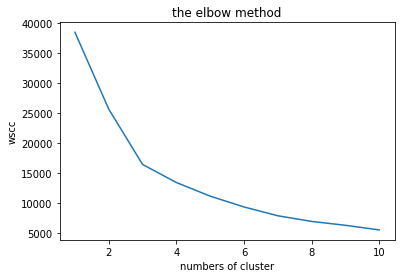

In [78]:
wscc=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=30)
    kmeans.fit(x)
    wscc.append(kmeans.inertia_)
plt.plot(range(1,11),wscc)
plt.title('the elbow method')
plt.xlabel('numbers of cluster')
plt.ylabel('wscc')
plt.show()
#from chart can see the best k value shuold be 3

In [83]:
#2, still can try 5 clusters
model2=cluster.KMeans(n_clusters=5,random_state=30)
model2.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=30, tol=0.0001, verbose=0)

In [84]:
x_cluster=model2.fit_predict(x)
score=metrics.silhouette_score(x,x_cluster)
print(score)

0.49229935259233326


In [89]:
#3, re-select the features
mobike_3=mobike[['timeduration','age','usertype_Customer','gender_Female','gender_Male']]

In [90]:
x3=pd.DataFrame(scale(mobike_3))

In [91]:
model3=cluster.KMeans(n_clusters=3,random_state=30)
model3.fit(x3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=30, tol=0.0001, verbose=0)

In [95]:
mobike_3['cluster']=model3.labels_

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
x3_cluster=model3.fit_predict(x3)
score=metrics.silhouette_score(x3,x3_cluster)
print(score)

0.6140404077479052


In [93]:
centers3=pd.DataFrame(model3.cluster_centers_)

In [94]:
centers3.to_csv('center3.csv')

In [96]:
mobike_3.groupby(['cluster'])['timeduration'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,4519.0,10.275725,7.884352,0.0,5.0,8.0,13.0,59.0
1,1258.0,11.240064,8.314306,1.0,6.0,9.0,14.0,58.0
2,645.0,23.269767,14.617221,0.0,12.0,20.0,32.0,59.0


In [97]:
mobike_3.groupby(['cluster'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,4519.0,37.041602,11.249575,0.0,29.0,34.0,43.0,79.0
1,1258.0,35.069952,10.422951,18.0,28.0,31.0,39.0,72.0
2,645.0,8.710078,14.819137,0.0,0.0,0.0,22.0,63.0


In [98]:
#4, change the features
mobike_4=mobike[['tripduration','age','usertype_Customer','gender_Female','gender_Male']]

In [99]:
x4=pd.DataFrame(scale(mobike_4))

In [101]:
model4=cluster.KMeans(n_clusters=3,random_state=30)
model4.fit(x4)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=30, tol=0.0001, verbose=0)

In [102]:
mobike_4['cluster']=model4.labels_

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [103]:
x4_cluster=model4.fit_predict(x4)
score=metrics.silhouette_score(x4,x4_cluster)
print(score)

0.6870453015153136


In [104]:
centers4=pd.DataFrame(model4.cluster_centers_)

In [106]:
centers4.to_csv('centers4.csv')